In [133]:
import json
import numpy as np
from collections import Counter
import re
from nltk import sent_tokenize

In [17]:
data = json.load(open('raw_data/all_train.json',encoding='utf-8'))


['Hotel Satisfaction',
 'Music Concert Attendance',
 'Company Bankruptcy Prediction',
 'Customer Churn Modelling',
 'Concrete Strength Classification',
 'Car Acceptability Valuation',
 'Student Job Placement',
 'Used Cars Price-Range Prediction',
 'Student Job Placement',
 'Concrete Strength Classification',
 'Student Job Placement',
 'Tic-Tac-Toe Strategy',
 'House Price Classification',
 'Advertisement Prediction',
 'Music Concert Attendance',
 'Mobile Price-Range Classification',
 'Cab Surge Pricing System',
 'Advertisement Prediction',
 'Flight Price-Range Classification',
 'Water Quality Classification',
 'Employee Attrition',
 'Company Bankruptcy Prediction',
 'House Price Classification',
 'E-Commerce Shipping',
 'Printer Sales',
 'Hotel Satisfaction',
 'Vehicle Insurance Claims',
 'Real Estate Investment',
 'Vehicle Insurance Claims',
 'Insurance Churn',
 'Student Job Placement',
 'Vehicle Insurance Claims',
 'Insurance Churn',
 'Credit Card Fraud Classification',
 'Tic-Tac-Toe

In [76]:
data[0].keys()

dict_keys(['model_name', 'deleted', 'mturk_id', 'predicted_class', 'narrative_status', 'predicted_class_label', 'date_submitted', 'id', 'feature_division', 'date_approved', 'test_instance', 'features_placeholder', 'is_paid', 'task_name', 'prediction_confidence', 'redeem_code', 'narrator', 'narration', 'user_ip', 'narrative_question', 'prediction_confidence_level'])

In [19]:
[i.get('task_name', None) for i in data]

530

In [99]:
from collections import Counter
count = Counter([i.get('task_name', None) for i in data])
(count.values())

dict_values([9, 4, 11, 9, 12, 6, 12, 15, 11, 12, 14, 14, 15, 22, 6, 14, 9, 15, 11, 8, 7, 8, 13, 13, 12, 9, 12, 11, 10, 5, 7, 11, 12, 10, 8, 13, 8, 11, 7, 5, 109])

In [95]:
count = Counter([i.get('model_name', None) for i in data])
(count.most_common())
count.values()

dict_values([85, 72, 4, 10, 21, 34, 4, 37, 6, 50, 20, 3, 13, 33, 6, 11, 1, 5, 4, 2, 109])

In [101]:
no_task = [x for x in data if x.get('narrative_question', None) == None]

In [105]:
len(no_task)

109

In [31]:
json.dump(no_task, open('no_task.json', 'w', encoding='utf-8'), ensure_ascii=False)

In [59]:
set([', '.join(sorted(list(task.keys()))) for task in data])

{'date_approved, date_submitted, deleted, feature_division, features_placeholder, id, is_paid, model_name, mturk_id, narration, narrative_question, narrative_status, narrator, predicted_class, predicted_class_label, prediction_confidence, prediction_confidence_level, redeem_code, task_name, test_instance, user_ip',
 'date_approved, date_submitted, deleted, feature_division, features_placeholder, id, is_paid, model_name, mturk_id, narration, narrative_question, narrative_status, narrator, predicted_class, predicted_class_label, prediction_confidence_level, redeem_code, task_name, test_instance, user_ip',
 'feature_division, narration, narration3, predicted_class, prediction_confidence_level',
 'feature_division, narration, predicted_class, prediction_confidence_level'}

There is only one instance of narration3. I think this must have been an instance where there was 2 narrations for one thing

In [106]:
Counter([', '.join(sorted(list(task.keys()))) for task in no_task]).most_common()

[('feature_division, narration, predicted_class, prediction_confidence_level',
  108),
 ('feature_division, narration, narration3, predicted_class, prediction_confidence_level',
  1)]

In [43]:
min([(len(d['prediction_confidence_level'].split(','))) for d in no_task])

3

In [44]:
task = [x for x in data if x.get('task_name', None) != None]

In [46]:
max([(len(d['prediction_confidence_level'].split(','))) for d in task])

4

In [107]:
no_task[0]

{'predicted_class': 'C3',
 'prediction_confidence_level': 'C1:40.36%, C2:10.15%, C3:49.49%',
 'feature_division': {'ranks': [['F14', 0],
   ['F8', 1],
   ['F15', 2],
   ['F28', 3],
   ['F2', 4],
   ['F36', 5],
   ['F30', 6],
   ['F9', 7],
   ['F26', 8],
   ['F3', 9],
   ['F18', 10],
   ['F13', 11],
   ['F35', 12],
   ['F33', 13],
   ['F32', 14],
   ['F34', 15],
   ['F38', 16],
   ['F42', 17],
   ['F23', 18],
   ['F43', 19],
   ['F12', 20],
   ['F31', 21],
   ['F4', 22],
   ['F24', 23],
   ['F5', 24],
   ['F39', 25],
   ['F21', 26],
   ['F22', 27],
   ['F37', 28],
   ['F20', 29],
   ['F16', 30],
   ['F25', 31],
   ['F40', 32],
   ['F11', 33],
   ['F10', 34],
   ['F41', 35],
   ['F17', 36],
   ['F29', 37],
   ['F6', 38],
   ['F1', 39],
   ['F7', 40],
   ['F19', 41],
   ['F27', 42]],
  'contradict': ['F8',
   'F28',
   'F2',
   'F36',
   'F30',
   'F3',
   'F18',
   'F13',
   'F32',
   'F34',
   'F38',
   'F43',
   'F12',
   'F31',
   'F4',
   'F24',
   'F22',
   'F16',
   'F25'],
  'supp

In [121]:
test = json.load(open('raw_data/test_set_new.json',encoding='utf-8'))
len(test)

48

In [67]:
Counter([', '.join(sorted(list(task.keys()))) for task in test]).most_common()

[('date_approved, date_submitted, deleted, feature_division, features_placeholder, id, is_paid, model_name, mturk_id, narration, narrative_question, narrative_status, narrator, predicted_class, predicted_class_label, prediction_confidence, prediction_confidence_level, redeem_code, task_name, test_instance, user_ip',
  24),
 ('date_approved, date_submitted, deleted, feature_division, features_placeholder, id, is_paid, model_name, mturk_id, narration, narrative_question, narrative_status, narrator, predicted_class, predicted_class_label, prediction_confidence_level, redeem_code, task_name, test_instance, user_ip',
  24)]

In [73]:
count = Counter([i.get('task_name', None) for i in test])
len(count.most_common())

31

In [108]:
all = json.load(open('raw_data/all.json',encoding='utf-8'))

In [123]:
test = [x['model_name']+x['task_name'] for x in all if x.get('test_instance', None) != None]
train = [x['model_name']+x['task_name'] for x in all if x.get('test_instance', None) == None]

In [118]:
Counter(test).most_common()

[('LogisticRegressionUsed Cars Price-Range Prediction', 9),
 ('LogisticRegressionFlight Price-Range Classification', 9),
 ('BernoulliNBPersonal Loan Modelling', 8),
 ('SGDClassifierHouse Price Classification', 8),
 ('RandomForestClassifierFlight Price-Range Classification', 7),
 ('RandomForestClassifierCompany Bankruptcy Prediction', 6),
 ('RandomForestClassifierStudent Job Placement', 6),
 ('SVM_polyMobile Price-Range Classification', 6),
 ('DecisionTreeClassifierInsurance Churn', 6),
 ('GradientBoostingClassifierBasketball Players Career Length Prediction', 6),
 ('SVMClassifier_polyEmployee Attrition', 6),
 ('SVM_linearEmployee Promotion Prediction', 6),
 ('KNeighborsClassifierCredit Risk Classification', 6),
 ('RandomForestClassifierMobile Price-Range Classification', 6),
 ('LogisticRegressionAirline Passenger Satisfaction', 6),
 ('GradientBoostingClassifierParis House Classification', 6),
 ('KNeighborsClassifierCab Surge Pricing System', 6),
 ('RandomForestClassifierPrinter Sales',

In [120]:
len(test)

469

## Number of Features

In [8]:
from datasets import load_dataset
import matplotlib.pyplot as plt

In [268]:
train = load_dataset("james-burton/textual-explanations", split='train')
test = load_dataset("james-burton/textual-explanations", split='test')
val = load_dataset("james-burton/textual-explanations", split='validation')

Using custom data configuration james-burton--textual-explanations-19ff8605823ae74a
Found cached dataset parquet (/home/james/.cache/huggingface/datasets/james-burton___parquet/james-burton--textual-explanations-19ff8605823ae74a/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)
Using custom data configuration james-burton--textual-explanations-19ff8605823ae74a
Found cached dataset parquet (/home/james/.cache/huggingface/datasets/james-burton___parquet/james-burton--textual-explanations-19ff8605823ae74a/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)
Using custom data configuration james-burton--textual-explanations-19ff8605823ae74a
Found cached dataset parquet (/home/james/.cache/huggingface/datasets/james-burton___parquet/james-burton--textual-explanations-19ff8605823ae74a/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)


[]

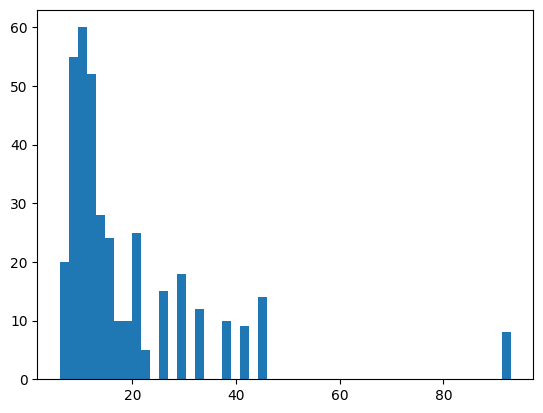

In [11]:
plt.hist([len(fs) for fs in  train['feature_nums']], bins=50)
plt.plot()

## Saving test narrations

In [18]:
with open('../jb_data/narrations_only_test.txt', 'w') as f:
    for item in test['narration']:
        f.writelines(item + '\n')
                


## Dataset information

Statistics for the train set (length 375)

The first question is either:
* Summarise the prediction (336 times)
* Summarise the ranking of the features (39 times)

The second question is either:
* Give an overview of the top features (250 times)
* Give direction of influence of the following features (86 times)
* Summarise the ranking of the features (39 times) ACCOUNTED FOR

The third question is either:
* Compare and contrast the following features (355 times)
* 'For these top features, what are the respective directions of influence on the prediction?'(20 times)

198 have 4 or more questions
* Describe the direction of the following features (121 times)
* Summarise the unimportant features (73 times)
* 'Describe the degree of impact of the following features: [blank]?' (4 times)

39 have 5 or more questions
* 'Provide a statement on the features with the least impact on the prediction made for this test case.' (39 times) ACCOUNTED FOR



```python
reg = re.compile(r'F\d+')
Counter([l['narrative_questions'][1] for l in train if l['narrative_questions'][0] == 'Provide a statement summarizing the prediction made for the test case.']).most_common()
[[' '.join(reg.findall(n)) for n in l['narrative_questions']] for l in train if l['narrative_questions'][0] == 'Provide a statement summarizing the prediction made for the test case.']
[' '.join(l['feature_nums']) for l in train if l['narrative_questions'][0] == 'Provide a statement summarizing the prediction made for the test case.']
```
A. For 99 cases the format is:
* 'In a single sentence, state the prediction output of the model for the selected test case along with the confidence level of the prediction (if applicable).'
* "In no less three sentences, provide a brief overview of the features with a higher impact on the model's output prediction."
* 'Describe the degree of impact of the following features: [0-4 fts (after first 7-9)]?' (3 times there are 0)

B. For 78 cases the format is:
* "For this test instance, provide information on the predicted label along with the confidence level of the model's decision." -->
* "Summarize the top features influencing the model's decision along with the respective directions of influence on the prediction?"
* 'Summarize the direction of influence of the features [the next 3-4 features (after first 2-4)] with moderate impact on the prediction made for this test case.'

C. For 53 cases the format is:
* 'Summarize the prediction for the given test example?'
* "In two sentences, provide a brief overview of the features with a higher impact on the model's output prediction."
* 'Compare and contrast the impact of the following attributes  [3-4 seemingly random features] on the model’s prediction of [C1/C2].'
* 'Summarize the set of features has little to no impact on the prediction?'

D. For 20 cases the format is:
* 'Summarize the prediction for the given test example?'
* 'For this test case, summarize the top features influencing the model's decision.'
* 'For these top features, what are the respective directions of influence on the prediction?'
* 'Provide a statement on the set of features has limited impact on the prediction of [C1/C2] by the model for the given test example?'

E. For 39 cases the format is:
* 'Summarize the prediction made for the test under consideration along with the likelihood of the different possible class labels.'
* 'Provide a statement summarizing the ranking of the features as shown in the feature impact plot.'
* 'Compare the direction of impact of the features: [2-5 top features].'
* 'Summarize the direction of influence of the features [the next 3-4 features] with moderate impact on the prediction made for this test case.'
* 'Provide a statement on the features with the least impact on the prediction made for this test case.'

F. For 44 cases the format is:
* 'Provide a statement summarizing the prediction made for the test case.'
* 'For the current test instance, describe the direction of influence of the following features: [2-5 top features]'
* 'Compare and contrast the impact of the following features [the next 3-4 features] on the model’s prediction of [C1/C2].'
* 'Describe the degree of impact of the following features: [the next 0-4 features]?' (usually 4 unless there are not enough features)

G. For 39 cases the format is:
* 'Provide a statement summarizing the ranking of the features as shown in the feature impact plot.'
* 'Summarize the direction of influence of the features [2-5 top features] on the prediction made for this test case.'
* 'Compare the direction of impact of the features: [the next 3-4 features].'
* 'Describe the degree of impact of the following features:[the next 0-4 features]'

H. For 3 cases the format is:
* 'Summarize the prediction made for the test under consideration along with the likelihood of the different possible class labels.'
* 'Summarize the direction of influence of the variables [2-3 top features] on the prediction made for this test case.' -->
* 'Compare the direction of impact of the variables: [the next 3-4 features].'
* 'Describe the degree of impact of the following variables: [the next 3-4 features]?'

| Q | A | New Q |
| ---- | ---- | ---- |
| Summarise the prediction | Note: In E (39) this question is asked across 2 sentences | Summarise the prediction |
| Summarise the top features | A-D (250): Top features aren't named, just says 'top features' | a) Summarise the top features |
|   | E-H  (125) specifies 2-5 top features | b) Summarise these top features ([fts]) |
|   | Note: In D (20) this question is asked across 2 sentences |   |
| Summarise moderate fts | A (99): 3-4 named fts (after first 7-9) | Summarise these moderate features ([fts]) |
|   | B, C (131): 3-4 named fts (after first 2-4) |   |
|   | E-H (125) named fts (the next 3-4) |   |
|   | Note: D (20) does not have this Q
| Summarise more/lower fts | C-E (112) describe fts with little to no impact (fts not named) | a) Summarise the negligible features |
|   | F-H (86) 0-4 named fts | b) Summarise these negligible features ([fts]) |
|   | Note: A,B (177) do not have a 4th Q |   |


In [245]:
Counter([l['narrative_questions'][0] for l in train ]).most_common()

[('In a single sentence, state the prediction output of the model for the selected test case along with the confidence level of the prediction (if applicable).',
  99),
 ("For this test instance, provide information on the predicted label along with the confidence level of the model's decision.",
  78),
 ('Summarize the prediction for the given test example?', 73),
 ('Provide a statement summarizing the prediction made for the test case.',
  44),
 ('Summarize the prediction made for the test under consideration along with the likelihood of the different possible class labels.',
  42),
 ('Provide a statement summarizing the ranking of the features as shown in the feature impact plot.',
  39)]

In [263]:
reg = re.compile(r'F\d+')
[[' '.join(reg.findall(n)) for n in l['narrative_questions']] for l in train if all((l['narrative_questions'][1] == "In two sentences, provide a brief overview of the features with a higher impact on the model's output prediction.", 1==1))]


[['', '', 'F5 F18 F1', ''],
 ['', '', 'F10 F12 F2 F21', ''],
 ['', '', 'F3 F10 F2 F6', ''],
 ['', '', 'F11 F2 F10 F15', ''],
 ['', '', 'F31 F15 F7', ''],
 ['', '', 'F4 F13 F16 F14', ''],
 ['', '', 'F3 F14 F11 F8', ''],
 ['', '', 'F2 F4 F5', ''],
 ['', '', 'F3 F13 F15', ''],
 ['', '', 'F12 F11 F19', ''],
 ['', '', 'F9 F59 F63', ''],
 ['', '', 'F13 F7 F18 F21', ''],
 ['', '', 'F24 F14 F30 F18', ''],
 ['', '', 'F4 F7 F5 F2', ''],
 ['', '', 'F4 F1 F14', ''],
 ['', '', 'F17 F26 F15', ''],
 ['', '', 'F8 F7 F1 F4', ''],
 ['', '', 'F11 F9 F4', ''],
 ['', '', 'F7 F2 F8', ''],
 ['', '', 'F15 F5 F4', ''],
 ['', '', 'F2 F10 F1 F4', ''],
 ['', '', 'F18 F12 F30 F10', ''],
 ['', '', 'F8 F7 F9 F1', ''],
 ['', '', 'F4 F10 F5 F9', ''],
 ['', '', 'F7 F6 F8', ''],
 ['', '', 'F4 F9 F7', ''],
 ['', '', 'F19 F22 F4', ''],
 ['', '', 'F8 F6 F4 F3', ''],
 ['', '', 'F9 F3 F2 F10', ''],
 ['', '', 'F2 F4 F6', ''],
 ['', '', 'F5 F6 F7', ''],
 ['', '', 'F8 F5 F7 F1', ''],
 ['', '', 'F9 F8 F16 F15', ''],
 ['', '', 'F

In [262]:
[' '.join(l['feature_nums']) for l in train if all((l['narrative_questions'][1] == , 1==1))]

['F3 F20 F10 F5 F18 F1 F17 F4 F15 F14 F19 F9 F16 F12 F6 F2 F7 F11 F8 F13',
 'F22 F12 F23 F9 F5 F26 F21 F3 F1 F13 F15 F25 F8 F10 F17 F20 F14 F24 F6 F7 F11 F18 F16 F19 F2 F4',
 'F11 F7 F3 F10 F2 F6 F9 F1 F8 F12 F4 F5',
 'F8 F14 F11 F2 F10 F15 F6 F16 F3 F12 F7 F4 F1 F13 F9 F5 F17',
 'F11 F46 F8 F36 F31 F15 F7 F29 F10 F35 F16 F38 F39 F6 F24 F30 F1 F26 F44 F14 F17 F9 F13 F19 F45 F18 F12 F42 F5 F34 F2 F37 F28 F23 F20 F4 F25 F32 F40 F22 F21 F27 F43 F33 F3 F41',
 'F8 F2 F4 F13 F16 F14 F7 F3 F11 F12 F10 F5 F17 F1 F9 F6 F15',
 'F2 F4 F3 F14 F11 F8 F17 F7 F10 F6 F16 F19 F18 F1 F15 F5 F9 F13 F12',
 'F7 F9 F1 F2 F4 F5 F8 F3 F6',
 'F12 F6 F8 F3 F13 F15 F5 F1 F10 F2 F9 F14 F7 F11 F4',
 'F26 F6 F16 F18 F4 F12 F11 F19 F22 F25 F23 F24 F2 F3 F13 F21 F17 F7 F20 F1 F5 F8 F9 F10 F14 F15',
 'F51 F26 F4 F55 F9 F59 F63 F6 F32 F28 F89 F50 F10 F43 F57 F65 F54 F19 F8 F42 F67 F45 F11 F71 F39 F87 F56 F73 F17 F22 F16 F23 F80 F60 F62 F88 F38 F91 F36 F52 F47 F5 F46 F49 F81 F68 F90 F2 F40 F1 F77 F93 F76 F75 F24 F21 F74

In [293]:
Counter([l['narrative_questions'][4] for l in train if all((l['narrative_questions'][0] == 'Summarize the prediction made for the test under consideration along with the likelihood of the different possible class labels.', l['narrative_questions'][1]=='Provide a statement summarizing the ranking of the features as shown in the feature impact plot.'))]).most_common()
# Counter([len(l['narrative_questions']) for l in train if l['narrative_questions'][0] == 'In a single sentence, state the prediction output of the model for the selected test case along with the confidence level of the prediction (if applicable).']).most_common()

[('Provide a statement on the features with the least impact on the prediction made for this test case.',
  39)]

## Investigating answers to the questions

### Q1: Summarise the ranking of the features
What does this mean?


In [98]:
[l['narration'].split(". ")[0] for l in train if l['narrative_questions'][0] == 'Provide a statement summarizing the ranking of the features as shown in the feature impact plot.']

['The classifier is 69.02% certain that the given case is under the class label C1, implying that the likelihood of C2 is only 30.98%',
 "According to the machine learning model, it is more likely that the case's label is C2, with a certainty of 100.0%, and this prediction decision is mainly based on the effects of the following features: F8, F10, F6, F9, and F1 on the model",
 'The given case is likely C2 with a confidence level of 87.50% judged based on the values of the input features supplied to the classifier and according to the attributions analysis, F9 and F2 have a high degree of impact',
 'The model has classified the instance as C2 due to the effects of the following features: F5, F8, F6, and F2',
 'The likelihood of C2 being the correct label for the selected case or instance is 67.54% according to the classifier',
 'The confidence level score with respect to each class label suggests that this case should be labelled as C2',
 'The prediction probability of C1 is 17.93% and


Answers to this question are almost always still the same as what we would have got for the other question: A statement on the prediction of the model.

### Q2: Summarise the ranking of the features

Is this the same as when asked in Q1?

In [100]:
[l['narration'].split(". ")[1] for l in train if l['narrative_questions'][1] == 'Provide a statement summarizing the ranking of the features as shown in the feature impact plot.']

[" Regarding the classifier's decision, there is close to an even split on the probability of either of the possible labels is the correct label but the classifier chooses the label as C2",
 'F6 and F10 are deemed the most important features whereas on the other hand all the other features have moderate to minimal amounts of influence',
 'The most relevant features that led to the C1 classification verdict are F5, F30, F26, F17, and F15',
 "According to the attribution analysis conducted, the different input variables have varying degrees of influence on the model's decision here",
 'F12 and F1 are the most important variables with respect to this classification verdict while all other variables are shown to have a medium or low impact',
 'F24 had the largest impact, followed by F23, F9, F18, F14, F10, F11, F2, F8, F21, F20, F27, F4, F12, F15, F19, F13, F16, F30, and finally, F29, which had the smallest non-zero impact',
 'F11 is by far the most influential feature whereas F4, F6, and 

Seems to just be a 2 sentence question asking the same thing as the single sentence

### Q3: 'For these top features, what are the respective directions of influence on the prediction?' Are these top features named?

For these 20 instances,
* 'Summarize the prediction for the given test example?'
* 'For this test case, summarize the top features influencing the model's decision.'
* 'For these top features, what are the respective directions of influence on the prediction?'
* 'Provide a statement on the set of features has limited impact on the prediction of [C1/C2] by the model for the given test example?'


In [145]:
reg = re.compile(r'F\d+')
[[reg.findall(n) for n in l['narrative_questions']] for l in train if l['narrative_questions'][2] == 'For these top features, what are the respective directions of influence on the prediction?']
Counter([len(l['narrative_questions']) for l in train if l['narrative_questions'][2] == 'For these top features, what are the respective directions of influence on the prediction?']).most_common()

[(4, 20)]

### Q4: Negligible features: which negligible features are mentioned in the questions